In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import findconnections as fc
import selfpropelledparticlevoronoi as sppv
import importlib

import matplotlib.axes as axx

In [177]:
size_of_wound = 2

In [178]:
coords = []
vorPointRegion1 = []
vorRegions = []

with open('closurewithtransition225/size'+str(size_of_wound)+'/centers.txt','r') as text:
            for line in text:
                last_line = (line.replace("\n","")).split(';')
                coords.append([float(last_line[1]),float(last_line[2])])
                vorPointRegion1.append(int(last_line[3]))
                l4 = last_line[4].replace("[","").replace("]","").split(',')
                lint4 = []
                if all('' == s or s.isspace() for s in l4):
                    vorRegions.append(lint4)
                    continue
                else:
                    for r in l4:
                        lint4.append(int(r))
                vorRegions.append(lint4)
                
coords = np.array(coords)
N = len(coords[:,0])
print(N)

vertices = []
with open('closurewithtransition225/size'+str(size_of_wound)+'/vertices.txt','r') as text:
            for line in text:
                last_line = (line.replace("\n","")).split(';')
                vertices.append([float(last_line[1]),float(last_line[2])])
vertices = np.array(vertices)

#print(vorPointRegion)

vorRidges = []
with open('closurewithtransition225/size'+str(size_of_wound)+'/edges.txt','r') as text:
            for line in text:
                last_line = (line.replace("\n","")).split(';')
                l4 = last_line[1].replace("[","").replace("]","").split(',')
                lint4 = []
                if all('' == s or s.isspace() for s in l4):
                    vorRidges.append(lint4)
                    continue
                else:
                    for r in l4:
                        lint4.append(int(r))
                vorRidges.append(lint4)
                

wloc = 0

with open('closurewithtransition225/size'+str(size_of_wound)+'/woundloc.txt','r') as text:
    for line in text:
        wloc = int(line.replace("\n",""))

av = []

vorPointRegion= []
for i in range(N):
    vorPointRegion.append(i)



224


In [179]:
Boundaries = []                
with open('closurewithtransition225/size'+str(size_of_wound)+'/boundaries.txt','r') as text:
    for line in text:
        last_line = line.replace("\n","")
        l4 = line.replace("[","").replace("]","").split(',')
        lint4 = []
        if all('' == s or s.isspace() for s in l4):
            Boundaries.append(lint4)
            continue
        else:
            for r in l4:
                lint4.append(int(r))
        Boundaries.append(lint4)


In [180]:
vor = Voronoi(coords)
vor.point_region = vorPointRegion
vor.regions = vorRegions
vor.ridge_vertices = vorRidges
vor.vertices = vertices

<Figure size 800x800 with 0 Axes>

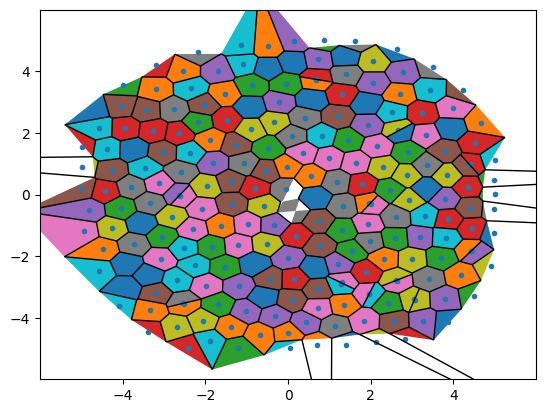

In [181]:
fig = plt.figure(figsize=(8,8))
voronoi_plot_2d(vor,show_vertices=False)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region if fc.norm(vor.vertices[i]) < np.sqrt(2)*5]
        plt.fill(*zip(*polygon))
        
plt.show()

In [182]:
lbound_up = np.where(vertices[Boundaries[0],1]>3)
bound_up = np.array(Boundaries[0])[lbound_up]


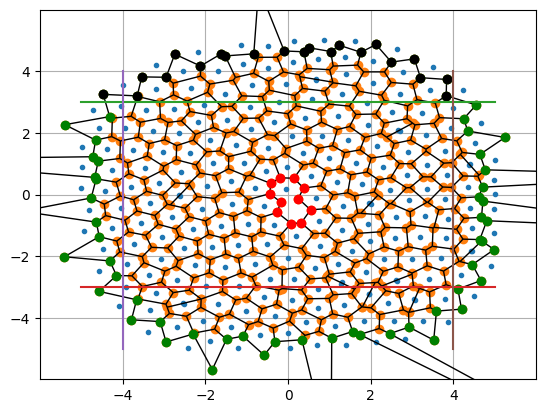

In [183]:
fig = voronoi_plot_2d(vor,show_vertices=True)
plt.plot(vertices[Boundaries[1],0],vertices[Boundaries[1],1],'ro')
plt.plot(vertices[np.array(Boundaries[0]),0],vertices[np.array(Boundaries[0]),1],'go')
plt.plot(vertices[bound_up,0],vertices[bound_up,1],'ko')
plt.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 + 3)
plt.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 - 3)
plt.plot(np.arange(-5,5)*0-4, np.arange(-5,5))
plt.plot(np.arange(-5,5)*0+4, np.arange(-5,5))  
plt.grid()
#plt.xlim(-6,-4)
#plt.ylim(-0.5,1)
plt.show()

In [184]:
importlib.reload(sppv)

<module 'selfpropelledparticlevoronoi' from '/home/rafael/Documents/tissuemodelling/SpringNetworkSimul/selfpropelledparticlevoronoi.py'>

In [185]:
areaWound0 = sppv.area_vor(vorPointRegion,vorRegions,vertices,vorRidges,wloc,True)

[1, 8, 9, 10, 7, 2, 3, 4, 5, 6, 0]


In [186]:
areaBound0 = sppv.area_vor([0],Boundaries,vertices,vorRidges,0,True)

[3, 34, 72, 35]


In [190]:
ordered_boundary =[1, 8, 9, 10, 7, 2, 3, 4, 5, 6, 0]

In [191]:
ord_bd = [28, 45, 9, 46, 24, 48, 10, 47, 41, 7, 42, 49, 11, 50, 63, 20, 56, 14, 55, 51, 12, 52, 54, 13, 53, 19, 33, 2, 32, 73, 30, 1, 31, 25, 69, 74, 62, 18, 61, 38, 5, 39, 40, 6, 36, 4, 37, 15, 57, 65, 21, 64, 43, 8, 44, 60, 17, 59, 58, 16, 35, 3, 34, 22, 66, 67, 23, 68, 26, 70, 75, 72, 27, 71, 29, 0]

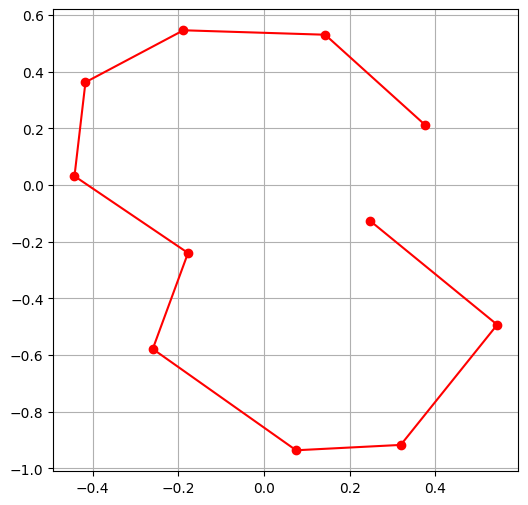

In [192]:
plt.figure(figsize=(6,6))
plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'ro-')
plt.grid()

<Figure size 800x800 with 0 Axes>

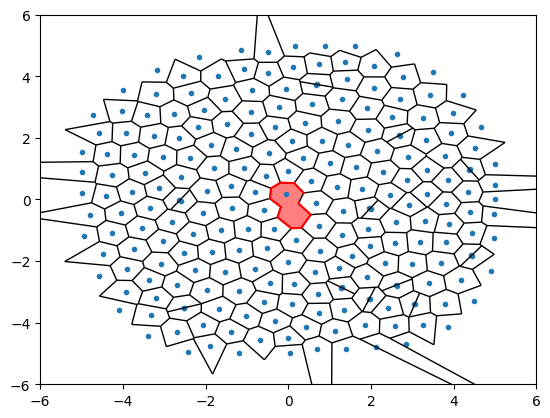

In [193]:
fig = plt.figure(figsize=(8,8))
voronoi_plot_2d(vor,show_vertices=False)

#bound_poly =  [vor.vertices[i] for i in list(np.array(Boundaries[0])[ord_bd]) if fc.norm(vor.vertices[i]) < np.sqrt(2)*5]       
#plt.fill(*zip(*bound_poly),'g',alpha=0.5)

#plt.plot(vertices[list(np.array(Boundaries[0])[ord_bd]),0],vertices[list(np.array(Boundaries[0])[ord_bd]),1],'g-')

wound_poly =  [vor.vertices[i] for i in list(np.array(Boundaries[1])[ordered_boundary]) if fc.norm(vor.vertices[i]) < np.sqrt(2)*5]       
plt.fill(*zip(*wound_poly),'r',alpha=0.5)
        
plt.plot(vertices[list(np.array(Boundaries[1])[ordered_boundary]),0],vertices[list(np.array(Boundaries[1])[ordered_boundary]),1],'r-')
plt.xlim(-6,6)
plt.ylim(-6,6)       
plt.show()


In [195]:
list_bit = np.array([44, 66, 132, 732 ,238, 83, 48, 33, 25,20,17,14])
list_beta = [0,0.5,1,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5]
beta_crit = 3-2/np.sqrt(2)

In [194]:
areaWound0

0.9089659415381548

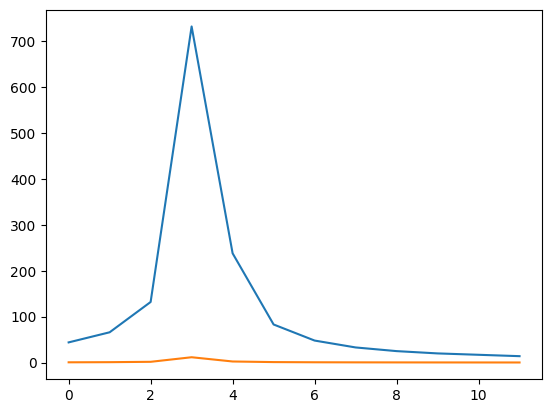

In [196]:
plt.plot(list_bit)
plt.plot(np.abs(1/(np.array(list_beta)-beta_crit)))

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
a = list_bit
b = np.abs(1/(np.array(list_beta)-beta_crit)).reshape(-1,1)
model = LinearRegression().fit(b,a)
coef_fit = model.coef_[0].round(2)
coef_betac = -(model.intercept_/model.coef_[0]).round(2)

#print(model.coef_)
print("Boundary is of the form: " +str(-coef_fit)+"("+str(coef_betac)+"-beta)")

Boundary is of the form: -63.16(-0.17-beta)


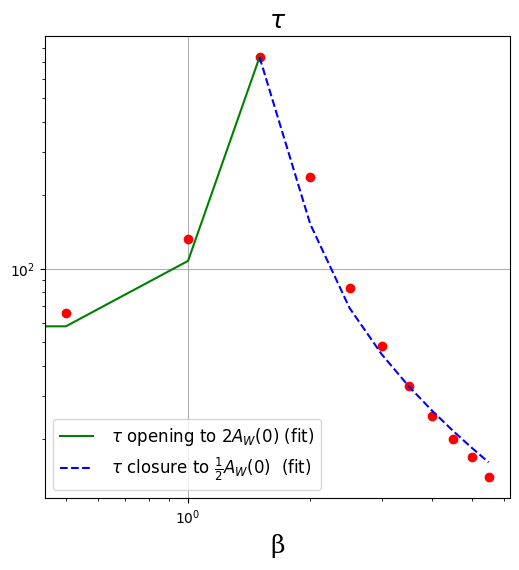

In [199]:
plt.figure(figsize=(6,6))
plt.plot(list_beta,a,'ro', linewidth=2)
plt.plot(list_beta[:4],b[:4]*63,'g',label=" $\\tau$ opening to $2A_W(0)$ (fit)")
plt.plot(list_beta[3:],b[3:]*63,'b--',label=" $\\tau$ closure to $\\frac{1}{2}A_W(0)$  (fit)")
plt.title("$\\tau$",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{\\beta}$",fontsize = 18,fontdict= {'family':'serif'})
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid()

In [82]:
areaBound0

12.10221827761428